# PID制御

参考: http://arduinopid.web.fc2.com/K1.html



## P制御

偏差の絶対値に応じて制御量を決める

$$
    u(t) = K_p e(t)
$$

$u$ : 制御量

$e$ : 偏差

$K_p$ : P制御に用いるフィードバックゲイン

とする

現実の機器ではある一定以上小さい値の制御は出来ないことを考慮し、制御量を整数とする

つまり、今回のシュミレーションの目標値は$100$であることから、目標値$1\%$以下の制御は出来ない


P制御の弱点である、定常偏差が残った

> 実値が目標値に対してある一定の偏差を持ち続けたまま 安定してしまう事があります(定常偏差)

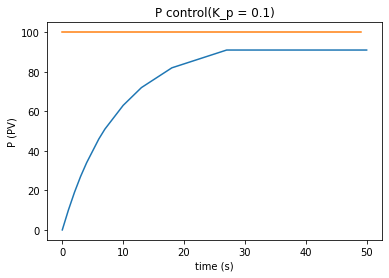

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 実行回数
term = 50

# P制御に用いるフィードバックゲイン
Kp = 0.1

# 各タームにおいて、実値と目標値を引数にとり、制御量を返す関数。制御量+実値が次のタームの実値となる
def run(feedback_value,target_value):
    error = target_value - feedback_value
    p = Kp * error
    return int(p)

if __name__ == "__main__":
    # 現在の実値
    feedback = 0
    # 各タームの実値
    feedback_list = [feedback]
    
    # 各実行時における目標値、今回はわかりやすさのため一定値にする
    target_values = np.full(term,100)
    for target_value in target_values:
        feedback += run(feedback,target_value)
        feedback_list.append(feedback)
    
    plt.title('P control(K_p = 0.1)')
    plt.xlabel('time (s)')
    plt.ylabel('P (PV)')
    plt.plot(feedback_list)
    plt.plot(target_values)

フィードバックゲインを変えれば定常偏差を減らせそうというお気持ちになる

大きくしてみる

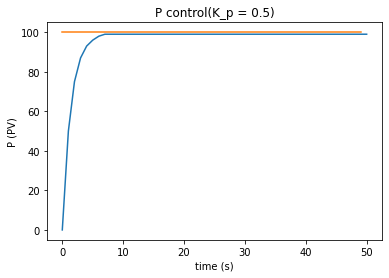

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 実行回数
term = 50

# P制御に用いるフィードバックゲイン
Kp = 0.5

# 各タームにおいて、実値と目標値を引数にとり、制御量を返す関数。制御量+実値が次のタームの実値となる
def run(feedback_value,target_value):
    error = target_value - feedback_value
    p = Kp * error
    return int(p)

if __name__ == "__main__":
    # 現在の実値
    feedback = 0
    # 各タームの実値
    feedback_list = [feedback]
    
    # 各実行時における目標値、今回はわかりやすさのため一定値にする
    target_values = np.full(term,100)
    for target_value in target_values:
        feedback += run(feedback,target_value)
        feedback_list.append(feedback)
    plt.title('P control(K_p = 0.5)')
    plt.xlabel('time (s)')
    plt.ylabel('P (PV)')
    plt.plot(feedback_list)
    plt.plot(target_values)

誤差、収束までの時間がともに改善された、さらに大きくしてみる

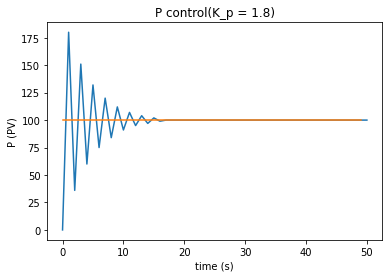

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 実行回数
term = 50

# P制御に用いるフィードバックゲイン
Kp = 1.8

# 各タームにおいて、実値と目標値を引数にとり、制御量を返す関数。制御量+実値が次のタームの実値となる
def run(feedback_value,target_value):
    error = target_value - feedback_value
    p = Kp * error
    return int(p)

if __name__ == "__main__":
    # 現在の実値
    feedback = 0
    # 各タームの実値
    feedback_list = [feedback]
    
    # 各実行時における目標値、今回はわかりやすさのため一定値にする
    target_values = np.full(term,100)
    for target_value in target_values:
        feedback += run(feedback,target_value)
        feedback_list.append(feedback)
    plt.title('P control(K_p = 1.8)')
    plt.xlabel('time (s)')
    plt.ylabel('P (PV)')
    plt.plot(feedback_list)
    plt.plot(target_values)

あまり大きすぎるとよくないことがわかった

## PI制御

P制御に加え、I制御は偏差の積算値に応じて制御量を決める

$$
    u(t) = K_p e(t) + K_i \int^t_0 e(\tau)d\tau
$$

$K_i$ : I制御に用いるフィードバックゲイン

とする

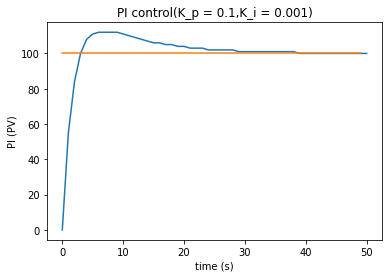

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 実行回数
term = 50

# P制御に用いるフィードバックゲイン
Kp = 0.5

# I制御に用いるフィードバックゲイン
Ki = 0.05

# 現在の実値
feedback = 0

# 現在のI制御による制御量
iv = 0

# 各タームにおいて、実値と目標値を引数にとり、制御量を返す関数。制御量+実値が次のタームの実値となる
def run(feedback_value,target_value):
    global iv
    error = target_value - feedback_value
    p = Kp * error
    iv += error
    i = Ki * iv
    return int(p+i)

if __name__ == "__main__":
    # 各タームの実値
    feedback_list = [feedback]
    
    # 各実行時における目標値、今回はわかりやすさのため一定値にする
    target_values = np.full(term,100)
    for target_value in target_values:
        feedback += run(feedback,target_value)
        feedback_list.append(feedback)
    plt.title('PI control(K_p = 0.5,K_i = 0.05)')
    plt.xlabel('time (s)')
    plt.ylabel('PI (PV)')
    plt.plot(feedback_list)
    plt.plot(target_values)

定常偏差は無くなった

フィードバックゲインを大きくしてみる

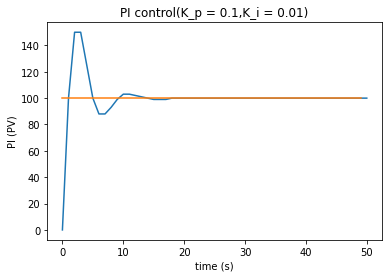

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 実行回数
term = 50

# P制御に用いるフィードバックゲイン
Kp = 0.5

# I制御に用いるフィードバックゲイン
Ki = 0.5

# 現在の実値
feedback = 0

# 現在のI制御による制御量
iv = 0

# 各タームにおいて、実値と目標値を引数にとり、制御量を返す関数。制御量+実値が次のタームの実値となる
def run(feedback_value,target_value):
    global iv
    error = target_value - feedback_value
    p = Kp * error
    iv += error
    i = Ki * iv
    return int(p+i)

if __name__ == "__main__":
    # 各タームの実値
    feedback_list = [feedback]
    
    # 各実行時における目標値、今回はわかりやすさのため一定値にする
    target_values = np.full(term,100)
    for target_value in target_values:
        feedback += run(feedback,target_value)
        feedback_list.append(feedback)
    plt.title('PI control(K_p = 0.5,K_i = 0.5)')
    plt.xlabel('time (s)')
    plt.ylabel('PI (PV)')
    plt.plot(feedback_list)
    plt.plot(target_values)

大きすぎると跳ね上がりすぎる